# Simulation de la loi binomiale avec Python
Auteur :  <a href="mailto:franck.chambon@académie-aix-marseille.france">Franck CHAMBON</a>

Un document issus de cet [ensemble de cours](https://htmlpreview.github.io/?https://raw.githubusercontent.com/FranckCHAMBON/Python-Lycee/master/Python-Presentation/Python-Presentation.html) pour *Python* et les mathématiques.

---

On rappelle que la [loi binomiale](https://fr.wikipedia.org/wiki/Loi_binomiale) modélise le nombre de succès obtenus lors de la répétition indépendante de plusieurs expériences aléatoires identiques.

Ces expériences aléatoires identiques et indépendantes peuvent être considérées comme des [épreuves de Bernoulli](https://fr.wikipedia.org/wiki/%C3%89preuve_de_Bernoulli).

Commençons par simuler ces épreuves ; on fera ensuite le compte des succès en cas de répétition.

## Simulation d'épreuve de Bernoulli
*Python* propose le [module `random`](https://docs.python.org/fr/3/library/random.html) qui fournit, en particulier les fonctions `randint` et `random`, générateurs de nombres pseudo-aléatoires.
- `randint(a, b)` : retourne un entier entre `a` inclus et `b` inclus.
- `random()` : retourne un flottant entre $0$ inclus et $1$ exclu. *Simule un réel.*

On peut s'en servir pour simuler une expérience de Bernoulli où la probabilité de succès est connue. Deux cas sont à envisager, la probabilité de succès est :
* une fraction $\frac a b$ ;
* ou bien une valeur réelle $p$.

La ligne ci-dessous est à inclure une fois pour toute au début d'un code *Python*, les fonctions sont alors ensuite accessibles.

In [1]:
from random import random, randint

### Exemple 1 : probabilité de succès, une fraction
![https://www.istockphoto.com/fr/illustrations/fiery-dragon?sort=best&mediatype=illustration&phrase=fiery%20dragon](assets/dragon.jpg)
![https://cdn.pixabay.com/photo/2012/04/18/15/01/hypercube-37278_960_720.png](assets/de_20.png)

Dans un jeu de rôle, on lance un dé à $20$ faces pour éviter la flamme d'un dragon, on réussit si le dé affiche $1$, $2$ ou $3$.
> Il s'agit d'une situation d'équiprobabilité (le dé est non truqué), avec $3$ issues favorables parmi $20$ issues possibles.  
> La probabilité de succès est $\frac 3 {20}$.

In [2]:
def évite_flamme_dragon():
    lancé = randint(1, 20)
    if lancé <= 3:
        return "Succès"
    else:
        return "Échec"

In [3]:
# Une utilisation possible, ici on teste 10 fois
for num_test in range(10):
    print(f"Test numéro {num_test} :", évite_flamme_dragon())

Test numéro 0 : Échec
Test numéro 1 : Échec
Test numéro 2 : Échec
Test numéro 3 : Succès
Test numéro 4 : Échec
Test numéro 5 : Échec
Test numéro 6 : Succès
Test numéro 7 : Succès
Test numéro 8 : Échec
Test numéro 9 : Échec


De manière générale, si on souhaite faire une épreuve de Bernoulli qui a une probabilité de succès égale à $\frac a b$, où
* $a$ est un entier positif ;
* $b$ est un entier positif non nul.
on peut écrire directement :

In [4]:
a, b = 3, 20
# par exemple

randint(1, b) <= a
# ceci est un booléen,
#     True avec la probabilité a/b
#     False avec la probabilité (b-a)/b

False

### Exemple 2 : probabilité de succès, un nombre réel

![https://publicdomainvectors.org/fr/gratuitement-des-vecteurs/Illustration-vectorielle-de-cibles-de-fl%C3%A9chettes-ronde/22173.html](assets/darts2.png)

Dans un jeu de fléchette, Tom envoie au hasard une fléchette dans une zone qui contient une cible.
> Tom réussit toujours à envoyer sa fléchette dans la zone carrée de $2~\textrm{m}$ qui a donc une aire de $4~\textrm{m}^2$, mais de façon aléatoire uniforme dans la zone.  
> Dans cette zone, il y a une cible, un disque de $1~\textrm{m}$ de rayon, et dont l'aire est donc $\pi~\textrm{m}^2$.
La probabilité de succès pour toucher la cible est donc $\frac \pi 4$.

In [5]:
from math import pi
# pour avoir accès à pi, une approximation de π

def touche_cible():
    if random() < (pi / 4):
        return "Succès"
    else:
        return "Èchec"

In [6]:
# Une utilisation possible, ici on teste 10 fois
for num_test in range(10):
    print(f"Test numéro {num_test} :", touche_cible())

Test numéro 0 : Succès
Test numéro 1 : Succès
Test numéro 2 : Èchec
Test numéro 3 : Succès
Test numéro 4 : Èchec
Test numéro 5 : Èchec
Test numéro 6 : Succès
Test numéro 7 : Succès
Test numéro 8 : Succès
Test numéro 9 : Succès


De manière générale, si on souhaite faire une épreuve de Bernoulli qui a une probabilité de succès égale à $p$, où
* $p$ est un réel compris entre $0$ et $1$.
on peut écrire directement :

In [7]:
p = pi / 4
# par exemple, ici p est environ égal à 0.7853981633974483

random() < p
# ceci est un booléen,
#     True avec la probabilité p
#     False avec la probabilité 1-p

True

## Simulation d'un schéma de Bernoulli
On répète maintenant plusieurs fois des expériences de Bernoulli identiques et de manière indépendante, et on compte le nombre de succès. On obtient un schéma de Bernoulli.

### Compter une fois le nombre de succès
On considère une expérience de Bernoulli de paramètre $p = 0.2$, et on répète $n = 100$ fois cette expérience de manière indépendante.

Comptons le nombre de succès :

In [8]:
p = 0.2
n = 100

nb_succès = 0 # initialisation
for _ in range(n):
    if random() < p:
        nb_succès += 1 # augmentation de 1

nb_succès

28

Il est raisonnable de trouver ici un nombre de succès proche de $p\times n = 0.2\times 100 = 20$.

On va répéter plusieurs fois ce schéma et afficher le nombre de succès.

### Compter plusieurs fois le nombre de succès

In [9]:
def simulation_schéma(p, n):
    "Retourne le nombre de succès dans un schéma de Bernoulli de paramètres p et n"
    nb_succès = 0 # initialisation
    for _ in range(n):
        if random() < p:
            nb_succès += 1 # augmentation de 1
    return nb_succès

In [10]:
p = 0.2 # proba de succès de l'épreuve de Bernoulli
n = 100 # nombre de répétition de l'épreuve

nb_rep_schem = 10 # nombre de répétition du schéma

for test in range(nb_rep_schem):
    nb_succès = simulation_schéma(p, n)
    print(f"Test numéro {test} : nombre de succès = {nb_succès}")

Test numéro 0 : nombre de succès = 24
Test numéro 1 : nombre de succès = 18
Test numéro 2 : nombre de succès = 21
Test numéro 3 : nombre de succès = 21
Test numéro 4 : nombre de succès = 15
Test numéro 5 : nombre de succès = 21
Test numéro 6 : nombre de succès = 19
Test numéro 7 : nombre de succès = 23
Test numéro 8 : nombre de succès = 25
Test numéro 9 : nombre de succès = 21


On aimerait obtenir un tableau de ces résulats

### Obtenir un tableau de résultats

In [11]:
p = 0.2 # proba de succès de l'épreuve de Bernoulli
n = 100 # nombre de répétition de l'épreuve

nb_rep_schem = 10000 # nombre de répétition du schéma

# on fait ici la construction d'un tableau par compréhension (c'est au programme de la spé math en première)
résultats = [simulation_schéma(p, n) for test in range(nb_rep_schem)]

# cette construction est équivalente à la suivante :
résultats = [] # une liste vide
for test in range(nb_rep_schem): # on répète plusieurs fois
    résultats.append(simulation_schéma(p, n)) # un ajout d'une valeur à la liste.

résultats[:10] #on affiche les 10 premières valeurs

[19, 12, 25, 18, 23, 18, 25, 20, 15, 16]

On aimerait obtenir un histogramme de ces résultats.

### Obtenir un histogramme
On commence par importer le module `matplotlib.pyplot` que l'on appelera ensuite `plt`

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

Dans notre exemple, le nombre de succès est souvent proche de $20$.

* On construit alors l'histogramme (avec `hist`),
* en se concentrant sur les valeurs de $0$ inclus à $40$ exclue (`range`).
* Cela fait $40$ valeurs entières distinctes, on fera alors $40$ barres (`bins`) ; une par valeur.

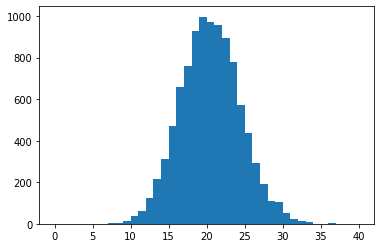

In [13]:
graphique = plt.hist(résultats, range = (0, 40), bins = 40)

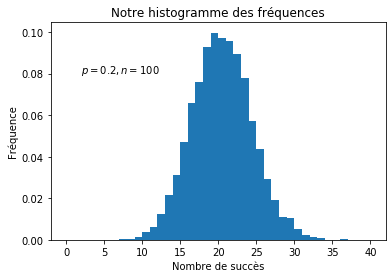

In [14]:
# pour les fréquences, on ajoute density=True
plt.hist(résultats, range = (0, 40), bins = 40, density=True)

# pour les titres
plt.xlabel("Nombre de succès")
plt.ylabel("Fréquence")
plt.title("Notre histogramme des fréquences")
plt.text(2, .08, "$p=0.2, n=100$")
plt.show()

Dans cet histogramme :
* la partie gauche indique qu'il n'arrive pas que le nombre de succès soit petit, comme inférieur à 5 avec cette simulation ;
* la partie droite indique qu'il n'arrive pas que le nombre de succès soit supérieur à 35 avec cette simulation ;
* la valeur la plus élevée indiquent quel nombre de succès est le plus fréquent.

On constate une forme symétrique qui peut être étudié de manière théorique.

### Comparer les statistiques et les probabilités
On pourrait comparer les fréquences obtenues avec les probabilités attendues.

D'abord rappelons (cours de maths) que dans un schéma de Bernoulli de paramètres $p$ et $n$,
> En notant $X$ la variable aléatoire du nombre de succès,   
> la probabilité d'obtenir $k$ succès est $\mathbb P(X = k) = \binom n k p^k (1-p)^{n-k}$

À partir de la version *Python 3.8*, [on pourra remplacer](https://docs.python.org/3/library/math.html#math.comb) les 3 premières lignes par
`from math import comb`

> `comb(n, k)` calcule le coefficient binomial $\binom n k$.

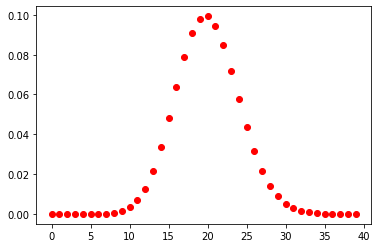

In [15]:
from math import factorial
def comb(n, k):
    return factorial(n) // factorial(k) // factorial(n-k)

plt.plot([comb(n, k) * p**k * (1-p)**(n-k) for k in range(0, 40)], "ro")
plt.show()

Sur l'exemple suivant, on plaque les deux graphiques, et on peut modifier les paramètres.

## Conclusion

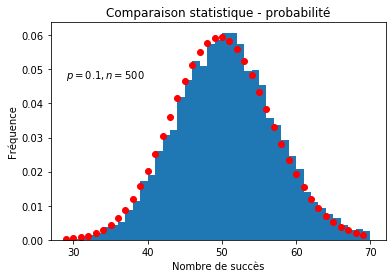

In [16]:
# indépendant de tout ce qui précède ; tout est redéfini, parfois réécrit avec un autre style

%matplotlib inline
import matplotlib.pyplot as plt
from random import random
from math import sqrt, factorial # , comb # à partir de Python 3.8
def comb(n, k): return factorial(n) // factorial(k) // factorial(n-k)

def simulation_schéma(p, n):
    "Retourne le nombre de succès dans un schéma de Bernoulli de paramètres p et n"
    # réécriture avec un style fonctionnel
    return sum(1 for _ in range(n) if random() < p)


#####  valeurs à modifier pour d'autres tests
p = 0.1
n = 500
nb_rep_schem = 10000
hw = 3 # demi-largeur en sigma pour l'intervalle

##### fin des modifications à faire



résultats = [simulation_schéma(p, n) for test in range(nb_rep_schem)]

mean = n * p  # espérance
variance = n * p * (1-p)
sigma = sqrt(variance)

minI = int(mean - hw * sigma)
maxI = int(mean + hw * sigma)

plt.plot(range(minI, maxI), [comb(n, k) * p**k * (1-p)**(n-k) for k in range(minI, maxI)], "ro")
plt.hist(résultats, range = (minI, maxI), bins = maxI - minI, density=True)
plt.xlabel("Nombre de succès")
plt.ylabel("Fréquence")
plt.title("Comparaison statistique - probabilité")
k = int(mean)
pXk = comb(n, k) * p**k * (1-p)**(n-k)
plt.text(minI, pXk*.8, f"$p={p}, n={n}$")
plt.show()